###  1 Language: Python

All numerical code should be written in Python.

In [48]:
import math 
import time
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

import scipy.optimize as opt
from scipy.optimize import fsolve
from scipy.optimize import root
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint

In [49]:
#This is just my general Euler forward function

def forward_euler(f, y0, t_start, t_stop, h):
    
    t_values = [t_start]
    y_values = [y0]

    while t_values[-1] < t_stop:
        t_next = t_values[-1] + h
        y_next = y_values[-1] + h * f(t_values[-1], y_values[-1])

        t_values.append(t_next)
        y_values.append(y_next)

    return t_values, y_values

In [50]:
#This is just my general Euler backward function

def backward_euler(f, y0, t_start, t_stop, h):
    t_values = [t_start]
    y_values = [y0]

    while t_values[-1] < t_stop:
        t_next = t_values[-1] + h
        y_next = y_values[-1] + h * f(t_next, y_values[-1])

        t_values.append(t_next)
        y_values.append(y_next)

    return t_values, y_values

In [51]:
# This is just my general RK4 function

def rk_4(f, y0, t_start, t_stop, h):
    
    # f is the function to integrate
    # y0 is the initial value
    # t_start is the start time
    # t_stop is the stop time
    # h is the step size
    
    t_values = [t_start]
    v_values = [y0]
    
    while t_values[-1] < t_stop:
        k1 = f(t_values[-1], v_values[-1])
        k2 = f(t_values[-1] + h/2, v_values[-1] + h/2 * k1)
        k3 = f(t_values[-1] + h/2, v_values[-1] + h/2 * k2)
        k4 = f(t_values[-1] + h, v_values[-1] + h * k3)
    
        t_next = t_values[-1] + h
        y_next = v_values[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

        t_values.append(t_next)
        v_values.append(y_next)

    return t_values, v_values

### 2. The number $N$

For me the number $N$ is $72$.

In [52]:
N=72

### 3. Existence but not uniqueness

Consider the BVP (Boundary Value Problem):
$$
y^{\prime} = \sqrt{|y|}, \quad y(0)=0
$$


#### Analytical Solution


For the $y<0$:
$$
\begin{gathered}
\frac{d y}{d x}=\sqrt{-y} \\
(-y)^{-\frac{1}{2}} \frac{d y}{d x}=1 \\
-2 \sqrt{-y}=x+c \\
-4 y=(x+c)^2 \\
y=-\frac{1}{4}(x+c)^2
\end{gathered}
$$
$$
y(x)=-\frac{x^2}{4}
$$

for $y>0$
$$
\begin{gathered}
\frac{d y}{d x}=\sqrt{y} \\
(y)^{-\frac{1}{2}} y^{\prime}=1 \\
2 y^{\frac{1}{2}}=x+c \\
y^{\frac{1}{2}}=\frac{1}{2}(x+c) \\
y=\frac{1}{4}(x+c)^2
\end{gathered}
$$
$$
y(x)=\frac{x^2}{4}
$$

***Coments***
1. **Existence of Multiple Solutions**: 
- The differential equation $y' = \sqrt{|y|}$ with the initial condition $y(0) = 0$ has multiple solutions. 
- This is evident from the analytical solutions we derived for both $y < 0$ and $y > 0$. 
- This behavior is characteristic of non-linear differential equations, where the existence of a solution is guaranteed, but uniqueness is not.

2. **Symmetry**: 
- The solutions $y(x) = -\frac{x^2}{4}$ for $y < 0$ and $y(x) = \frac{x^2}{4}$ for $y > 0$ are symmetric about the x-axis. 
- This is expected given the absolute value in the differential equation, which makes the equation symmetric about the y-axis.

3. **Boundary Behavior**: 
- The solution approaches $y = 0$ as $x$ approaches 0 from both the positive and negative sides. 
- This is consistent with the given boundary condition $y(0) = 0$.

#### Numerical Solution

*I like RK4 it seemed like the best one due to its accuracy and stability.*

In [53]:
# This is a slightly modified version of the RK4 function that I used for the problem3

def rk_4_for_problem3(f, y0, t_start, t_stop, h):
    
    # f is the function to integrate
    # y0 is the initial value
    # t_start is the start time
    # t_stop is the stop time
    # h is the step size
    
    t_value = [t_start]
    y_value = [y0]
    sample_t = []
    sample_y = []
    
    # sample_t is the list of time values
    # sample_y is the list of y values
    # the sample_t and sample_y are the values that satisfy the condition y(t) = 0
    
    while t_value[-1] < t_stop:
        k1 = f(t_value[-1], y_value[-1])
        k2 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k1)
        k3 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k2)
        k4 = f(t_value[-1] + h, y_value[-1] + h * k3)
        
        t_next = t_value[-1] + h
        y_next = y_value[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        
        t_value.append(t_next)
        y_value.append(y_next)
        
        # I added this to check if y deviates from 0
        if y_next > 1e-4:
            break
        
        if abs(y_next) < 1e-4:
            sample_t.append(t_next)
            sample_y.append(y_next)
    
    return sample_t, sample_y

In [54]:
# Define the function
def f(t, y):
    return np.sqrt(abs(y))

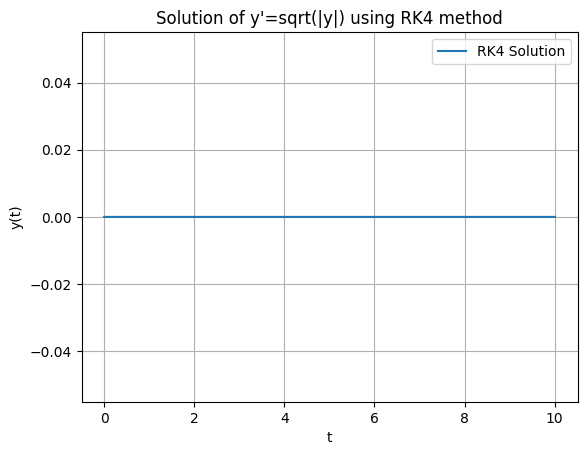

In [55]:
t_start = 1
y0 = -10
t_stop = 10
N = 1000
h = (t_stop - t_start) / N

t, y = rk_4(f, 0, 0, t_stop, h)

plt.plot(t, y, label='RK4 Solution')
plt.title("Solution of y'=sqrt(|y|) using RK4 method")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
t_start = -1
y_plus_epsilon = -1 + 1e-10
t_stop = 10
# Here if I use my N=72 The graph look ugly, so I used N=100000
# If I use N=72 the graph looks like 2 streight lines.
N=100000
h = (t_stop - t_start) / N

t, y = rk_4_for_problem3(f, y_plus_epsilon, t_start, t_stop, h)
print(f"Stuck at y = 0 between {round(t[1], 3)} and {round(t[-1], 5)}")

Stuck at y = 0 between 0.98 and 1.01993


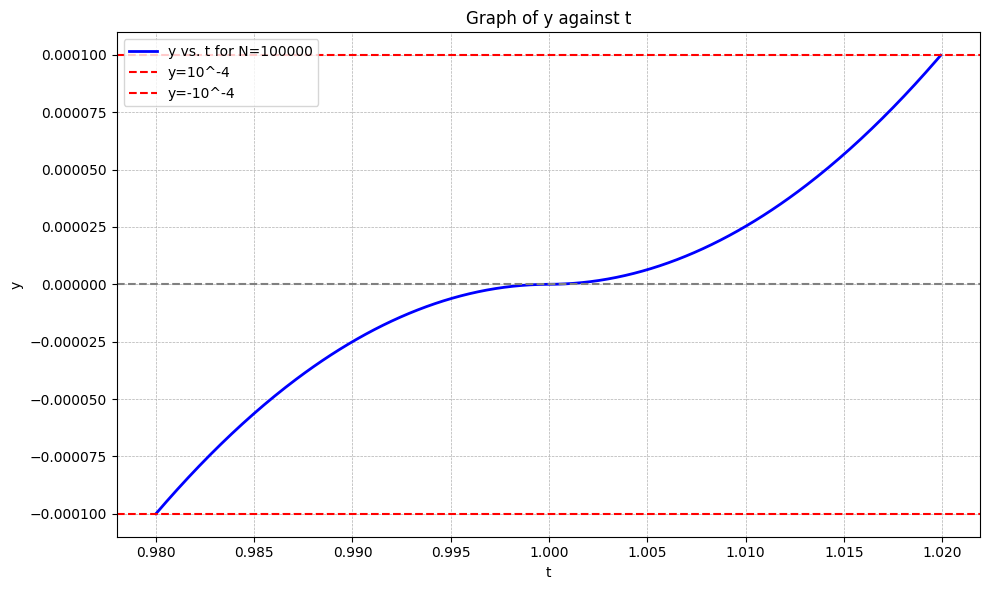

In [57]:
#Plot - I wanted to make it nice...
plt.figure(figsize=(10, 6))
plt.title('Graph of y against t')
plt.plot(t, y, color='blue', linestyle='-', linewidth=2, label='y vs. t for N=100000')

# Add horizontal lines for zero & tolerance
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1e-4, color='red', linestyle='--', label="y=10^-4")
plt.axhline(-1e-4, color='red', linestyle='--', label="y=-10^-4")

plt.xlabel('t')
plt.ylabel('y')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

***Numerical Comments***

1. **RK4 Method**: 
- If we have non-unique solutions, the numerical method might converge to one of the possible solutions.
- Where the method converges is based on our initial condition and step size.

2. **Straight Line in First Plot**: 
- The plot with a straight line shows one numerical solution that remains at $y = 0$. 
- This is one of the solutions to the equation, but it's not the only one!

3. **Sensitivity to Initial Conditions**: 
- Small perturbation `y_plus_epsilon = -1 + 1e-10` to the initial condition. 
- This results in the solution deviating from $y = 0$. 
- This shows that the equation is extremly sensitive to initial conditions, especially near the boundary $y = 0$!

##### Extra
- Let's try to illustrate this better:

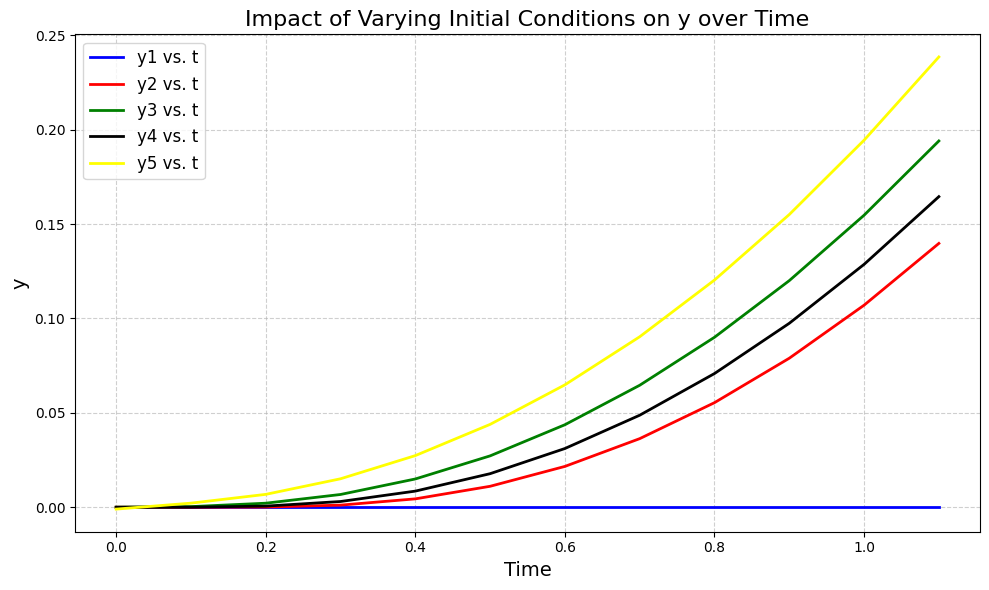

In [81]:
# Assume that I have several points to test.

# I define my initial conditions
y1_initial=0
y2_initial=0+1e-10
y3_initial=0+1e-5
y4_initial=0-1e-7
y5_initial=0-1e-3

# I have my function
def f(t, y):
    return np.sqrt(abs(y))

#This is just my general Euler forward function
def forward_euler_problem3(f, y_initial, t_start, t_stop, h):
    
    t_values = [t_start]
    y_values = [y_initial]

    while t_values[-1] < t_stop:
        t_next = t_values[-1] + h
        y_next = y_values[-1] + h * f(t_values[-1], y_values[-1])

        t_values.append(t_next)
        y_values.append(y_next)

    return t_values, y_values

# Get the values for y1, y2, y3, y4, y5
y1_values = forward_euler_problem3(f, y1_initial, 0, 1, 0.1)
y2_values = forward_euler_problem3(f, y2_initial, 0, 1, 0.1)
y3_values = forward_euler_problem3(f, y3_initial, 0, 1, 0.1)
y_4values = forward_euler_problem3(f, y4_initial, 0, 1, 0.1)
y_5values = forward_euler_problem3(f, y5_initial, 0, 1, 0.1)

# I plot the graphs
# I plot the graphs
plt.figure(figsize=(10, 6))
plt.title('Impact of Varying Initial Conditions on y over Time', fontsize=16)
plt.plot(y1_values[0], y1_values[1], color='blue', linestyle='-', linewidth=2, label='y1 vs. t')
plt.plot(y2_values[0], y2_values[1], color='red', linestyle='-', linewidth=2, label='y2 vs. t')
plt.plot(y3_values[0], y3_values[1], color='green', linestyle='-', linewidth=2, label='y3 vs. t')
plt.plot(y_4values[0], y_4values[1], color='black', linestyle='-', linewidth=2, label='y4 vs. t')
plt.plot(y_5values[0], y_5values[1], color='yellow', linestyle='-', linewidth=2, label='y5 vs. t')
plt.xlabel('Time', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

- In summary, we demonstrate that for $y^{\prime} = \sqrt{|y|}$, there are infinitely many solutions in the neighborhood of $0$.
- This is due to the nature of the differential equation and sensitivity to initial conditions.
- This is related to Picards Theorem!

### 4. PANG!

Betrakta BVP
$$
y^{\prime}=y^2, \quad y(0)=N / 100
$$

#### Analytical Solution


$$
y' = y^2
$$

$$
\frac{dy}{y^2} = dt
$$

$$
\int \frac{dy}{y^2} = \int dt
$$

$$
-\frac{1}{y} = t + C
$$

$$
-\frac{1}{\frac{N}{100}} = C
$$

$$
C = -\frac{100}{N}
$$

$$
-\frac{1}{y} = t - \frac{100}{N}
$$

$$
y(t) = \frac{N}{100 - Nt}
$$

$$
y(t) = \frac{N}{100 - Nt}
$$

The solution "blows up" when the denominator is zero:
$$
100 - Nt = 0
$$
$$
t = \frac{100}{N}
$$

#### Numerical Solution

In [58]:
# This is a slightly modified version of the RK4 function that I used for the problem4

def rk_4_for_problem4(f, y0, t_start, t_stop, h):
    
    # f is the function to integrate
    # y0 is the initial value
    # t_start is the start time
    # t_stop is the stop time
    # h is the step size 
    
    t_value = [t_start]
    y_value = [y0]
    
    # sample_t is the list of time values
    # sample_y is the list of y values
    # the sample_t and sample_y are the values that satisfy the condition y(t) = 0
    
    while t_value[-1] < t_stop:
        k1 = f(t_value[-1], y_value[-1])
        k2 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k1)
        k3 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k2)
        k4 = f(t_value[-1] + h, y_value[-1] + h * k3)
        
        t_next = t_value[-1] + h
        y_next = y_value[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        
        t_value.append(t_next)
        y_value.append(y_next)
        
        # I define this arbitrary value 1e10 to tell me that the function is diverging
        # This arbitrary restrtion should give me my time to singularity, given my stepsize is also nice and small.
        if y_next > 1e10:
            break
    
    return t_value, y_value

In [59]:
# Define the function
def f(t,y):
    return y**2

***Simple numerical simulation of the differential equation $y^{\prime}=y^2$***

In [82]:
#Initial conditions
N=72
y0 = N / 100
t_start = 0
t_stop = 5
h = (t_stop - t_start) / 1000

# Return evenly spaced numbers over a specified interval.
t_values = np.arange(0, t_stop, h)
y_values = []

#Kick off the loop
y = y0

for t in t_values:
    y_values.append(y)
    y += h * y**2
    # I define this arbitrary value 1e50 to stop the loop as blowing up
    if abs(y) > 1e50:
        print("Solution is growing too rapidly. Stopping integration.")
        break

t_values = t_values[:len(y_values)]

Solution is growing too rapidly. Stopping integration.


***Blowing up***

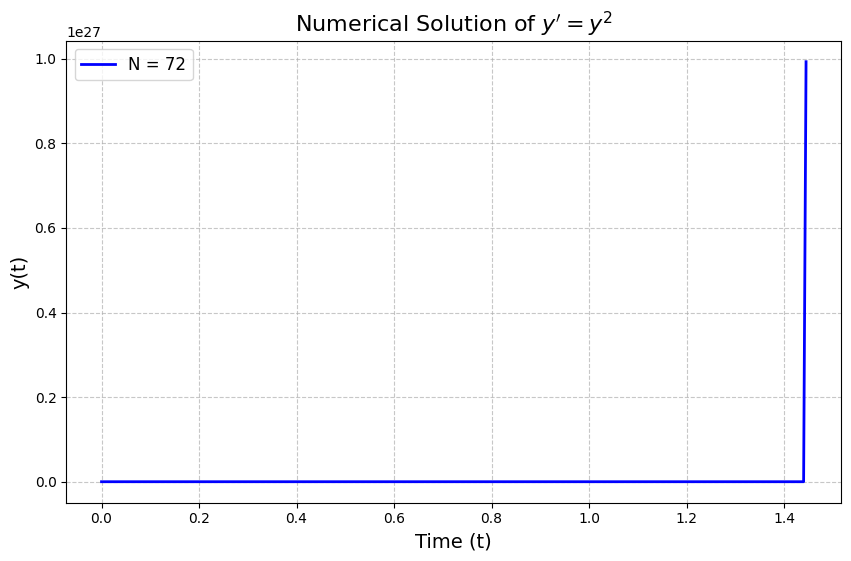

Estimated time to singularity: 10.000099999990033


In [85]:
#Initial conditions
N=72
y0 = N / 100
t_start = 0
t_stop = 10
h = (t_stop - t_start) / 100000

t,y=rk_4_for_problem4(f, y0, t_start, t_stop, h)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_values[:len(y_values)], y_values, label=f'N = {N}', color='b', linewidth=2)
plt.xlabel('Time (t)', fontsize=14)
plt.ylabel('y(t)', fontsize=14)
plt.title("Numerical Solution of $y' = y^2$", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Estimated time to singularity:", t[-1])

#### Picard

Show via Picard that if $y(0)<0$, then $y(t)<0$ for all $t>0$. 

**Picard Iteration**:

$$ y_{n+1}(t) = y_0 + \int_{t_0}^{t} f(s, y_n(s)) \, ds $$

For $ f(t, y) = y^2 $

**First Iteration**:
$$ y_1(t) = y_0 + \int_{0}^{t} y_0^2 \, ds $$
$$ y_1(t) = y_0 + y_0^2 t $$

**Second Iteration**:
$$ y_2(t) = y_0 + \int_{0}^{t} (y_0 + y_0^2 s)^2 \, ds $$
$$ y_2(t) = y_0 + \int_{0}^{t} y_0^2 + 2y_0^3 s + y_0^4 s^2 \, ds $$
$$ y_2(t) = y_0 + y_0^2 t + y_0^3 t^2 + \frac{1}{3} y_0^4 t^3 $$


#### Numerical example

- Can you find numerical examples where $y(0)=\epsilon<0$, but $y(t)>0$ for some $t>0$? 

    - Tips: You may need to modify the equation slightly and use $y' - Cy^2 =0$ for a "large" $C>0". 




In [62]:
#I think this is a cute solution, although I'm not sure if we are allowed to do it like this...

def solve_diff_eq(C, epsilon, t_max, h):

    # Define my differential equation
    def f(t, y):
        return -C * y**2

    # Initialize arrays for t and y values
    t_values = np.arange(0, t_max, h)
    y_values = []

    y = epsilon

    for t in t_values:
        y_values.append(y)
        y += h * f(t, y)

    return t_values, y_values

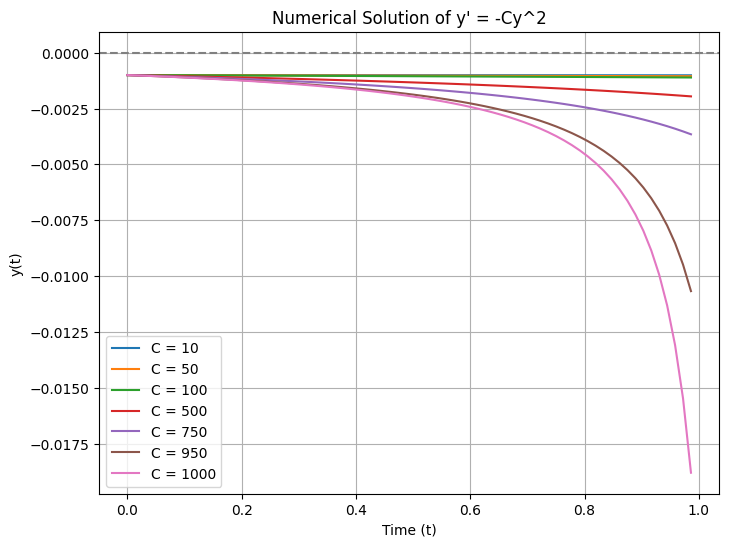

In [63]:
# Initial conditions
t_start = 0
t_stop = 1
h = (t_stop-t_start) / N

# Define the epsilon value and C values
epsilon = -1e-3
C_values = [10, 50, 100, 500, 750, 950, 1000]  # Large positive C values we want to try

# Plot the solutions
plt.figure(figsize=(8, 6))

# Solve and plot for each C value
for C in C_values:
    t_values, y_values = solve_diff_eq(C, epsilon, t_stop, h)
    plt.plot(t_values, y_values, label=f'C = {C}')

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title("Numerical Solution of y' = -Cy^2")
plt.legend()
plt.grid(True)
plt.show()

#### Philosophical pondering: 
- If we were to create an "auto-solver," how should it avoid/detect deeply erroneous solutions of this kind?

1. Sensitivity Analysis: 
- We could test the "robustness" of the solution by slightly perturbing initial conditions or parameters. 
- If small changes lead to vastly different solutions, it's a sign that the solution might be erroneous or the system is highly sensitive.

2. Consistency Check: 
- For problems with known analytical solutions we could compare the numerical solution with the analytical one.

3. Adaptive Step Size: 
- When we use methods like Euler's method, Runge-Kutta, we often use a fixed step size.
- However, not all regions of the solution are the same. 
- Some parts of the solution might change slowly and smoothly, while others might have rapid changes.
- If the step size is too large, rapid changes in the solution might be missed
- If the step size is too small, it might lead to unnecessary computations in regions where the solution is changing slowly, making the method inefficient.
- Instead we could adjust the step size as the solution progresses.
- By adapting to the behavior of the solution, the method can capture rapid changes.
-  In regions where the solution is smooth, the method can use larger step sizes, reducing the number of computations and speeding up the solution process.
4. Boundary and Limit Checks:
- If the problem has known boundaries or limits, the solver should constantly check if the solution remains within these bounds.


###  5. Not a PANG

Consider the BVP (Boundary Value Problem):
$$
y^{\prime}=y, \quad y(0)=N
$$

- Solve the problem numerically and find $y\left(2^k\right)$ with two correct decimal places for $k=1,2,3, \ldots$ 
- Torture your computer until it gives up!

#### Analytical Solution

$$y' = y$$
$$
\frac{\frac{d y(t)}{d t}}{y(t)}=1
$$
$$
\int \frac{\frac{d y(t)}{d t}}{y(t)} d t=\int 1 d t
$$
$$
\log (y(t))=t+c_1
$$
$$
y(t)=e^{t+c_1}
$$
$$
y(t)=c_1 e^t
$$
$$
c_1=N
$$
$$
y(t)=N e^t
$$


#### Numerical Solution

##### Original Code:

In [87]:
# The function then returns whether the goal was exactly met 
def rk_4_for_problem5(f, y0, t_start, goal_value, h):
    
    # f is the function to integrate
    # y0 is the initial value
    # t_start is the start time
    # t_stop is the stop time
    # h is the step size 
    
    t_value = [t_start]
    y_value = [y0]
    
    # Here I define a condition that will tell me if the goal is met
    condition = True
    
    while condition:
        
        k1 = f(t_value[-1], y_value[-1])
        k2 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k1)
        k3 = f(t_value[-1] + h/2, y_value[-1] + h/2 * k2)
        k4 = f(t_value[-1] + h, y_value[-1] + h * k3)
        
        t_next = t_value[-1] + h
        y_next = y_value[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
        
        t_value.append(t_next)
        y_value.append(y_next)

        # Check if the goal is met exactly
        if round(y_value[-1], 2) == round(goal_value, 2):
            # I return the last value of y where we met the goal.
            return condition, y_value[-1]
        
        #Check if we overshot the goal
        if round(y_value[-1], 2) >= round(goal_value, 2):
            condition = False
            # I return the last value of y before we overshot the goal
            return condition, y_value[-1]

In [65]:
def f(t,y): 
    return y

In [66]:
def y(t):
    return 72* np.exp(t)

In [67]:
#Initial conditions
N=100
y0 = 72
t_start = 0

# I dont need this cariable for this problem
#t_stop = 1
#h = (t_stop - t_start) / 10000

#Define k that will kick off the loop
k=0

#Define the goal value that we want to reach
goal_value=y(2**k)


while True:
    # Define my goal value
    goal_value=y(2**k)
    # I want to be able to adjust the step size so that I can get closer to the goal value
    h = (2**k - t_start) / N
    condition, y_value = rk_4_for_problem5(f, y0, t_start, goal_value, h)
    if not condition:
        # This will give me smaller steps when the while loop runs again.
        N=N*1e3
    if condition:
        print(f"Goal value is {goal_value} at k={k} for stepsize={h}")
        #Because the ride never ends...
        k+=1

Goal value is 195.71629164905124 at k=0 for stepsize=0.01
Goal value is 532.0120391230068 at k=1 for stepsize=0.02
Goal value is 3931.066802386385 at k=2 for stepsize=0.04


Goal value is 214628.97506700445 at k=3 for stepsize=8e-05
Goal value is 639799957.4765668 at k=4 for stepsize=0.00016


KeyboardInterrupt: 

#####  Alternative Code:

In [ ]:
import numpy as np

def f(t, y):
    return y

# Exact solution
def y_exact(t, N):
    return N * np.exp(t)

def rk4_try(f, y0, t_start, t_end, h):
    t_values = [t_start]
    y_values = [y0]
    t = t_start
    y = y0
    while t < t_end:
        k1 = h * f(t, y)
        k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
        k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
        k4 = h * f(t + h, y + k3)
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return t_values, y_values

# Initial conditions
N = 72
y0 = N
t_start = 0
h = 0.01  # Initial step size

k = 0
while True:
    t_end = 2**k
    t_values, y_values = rk4_try(f, y0, t_start, t_end, h)
    print(f'For k={k}, y(2^k) is approximately {y_values[-1]:.2f} (Exact value: {y_exact(t_end, N):.2f})')
    k += 1
    if k > 10:  # Limit to prevent infinite loop
        break

For k=0, y(2^k) is approximately 195.72 (Exact value: 195.72)
For k=1, y(2^k) is approximately 532.01 (Exact value: 532.01)
For k=2, y(2^k) is approximately 3970.57 (Exact value: 3931.07)
For k=3, y(2^k) is approximately 216786.03 (Exact value: 214628.98)
For k=4, y(2^k) is approximately 646230053.09 (Exact value: 639799957.48)
For k=5, y(2^k) is approximately 5685333118117936.00 (Exact value: 5685333133153010.00)
For k=6, y(2^k) is approximately 453442560303864588287084593152.00 (Exact value: 448930733818436431949932265472.00)
For k=7, y(2^k) is approximately 2799150022706258335821213040775206506438551282140787507200.00 (Exact value: 2799150052316108663432051802170874851994008315163083538432.00)
For k=8, y(2^k) is approximately 109916476795738776656820750319447500828798401777006470403825739629042844143435646285098495614319696954093094305792.00 (Exact value: 108822791880295449723441164020863587405407341857450728681240188172227694965433016429425148927465753527137008091136.00)
For k=9, y

C:\Users\villi\AppData\Local\Temp\ipykernel_18872\744536970.py:8: RuntimeWarning: overflow encountered in exp
  return N * np.exp(t)


###  6. What is $\pi$?

Read the beginning of Chapter 4.24. Consider the BVP (Boundary Value Problem):
$$
y^{\prime \prime}+y=0, \quad y(0)=1, \quad y^{\prime}(0)=0
$$

#### Analytical Solution

$$ y'' + y = 0 $$
$$ y(0) = 1 $$
$$ y'(0) = 0 $$

---

$$ y(t) = e^{mt} $$
$$ m^2 e^{mt} + e^{mt} = 0 $$

Factoring out $e^{mt}$ I should be able to do this since it's never zero...
$$ m^2 + 1 = 0 $$

My Characteristic equation is:
$$ m^2 = -1 $$

From this I  get:
$$ m = i, \quad m = -i $$

Using Euler:
$$ e^{it} = \cos(t) + i \sin(t) $$
$$ e^{-it} = \cos(t) - i \sin(t) $$


$$ y(t) = A (\cos(t) + i \sin(t)) + B (\cos(t) - i \sin(t)) $$
$$ y(t) = (A + B) \cos(t) + i (A - B) \sin(t) $$


$$ A - B = 0 $$
$$ A = B $$


$$ y(t) = 2A \cos(t) $$


$$ y(0) = 2A = 1 $$
$$ A = \frac{1}{2} $$

$$ y(t) = \cos(t) $$


---

#### Gameplan:

- We can define $\pi/2$ as the first value at $t>0$ such that $y(t)=0$? 

- We could estimate $\pi$ by solving the BVP numerically => by estimating a zero crossing. 

#### Code:


- Warm-up: How many correct digits can you get before your computer melts? 
    - Try Euler and better methods.

##### Naive implementation of the RK4 method:

In [ ]:
# Define the differential equation and its derivative
f = lambda t, y, yp: -y

# Euler's method
def euler_method(h, t_max):
    t = 0
    y = 1
    yp = 0
    while y > 0:
        yp_new = yp + h * f(t, y, yp)
        y += h * yp
        yp = yp_new
        t += h
    return t

# 4th order Runge-Kutta method
def runge_kutta(h, t_max):
    t = 0
    y = 1
    yp = 0
    while y > 0:
        k1 = h * yp
        l1 = h * f(t, y, yp)
        k2 = h * (yp + 0.5 * l1)
        l2 = h * f(t + 0.5 * h, y + 0.5 * k1, yp + 0.5 * l1)
        k3 = h * (yp + 0.5 * l2)
        l3 = h * f(t + 0.5 * h, y + 0.5 * k2, yp + 0.5 * l2)
        k4 = h * (yp + l3)
        l4 = h * f(t + h, y + k3, yp + l3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yp += (l1 + 2 * l2 + 2 * l3 + l4) / 6
        t += h
    return t

# Step size
h = 0.000001
t_max=10000

# Estimate pi using both methods
pi_euler = 2 * euler_method(h, t_max)
pi_rk = 2 * runge_kutta(h, t_max)

print(f'Pi estimated using Euler method: {pi_euler}')
print(f'Pi estimated using Runge-Kutta method: {pi_rk}')

Pi estimated using Euler method: 3.141593999921921
Pi estimated using Runge-Kutta method: 3.141593999921921


##### Try Harder:


---

- After warming up: find 20 correct decimal places. 
    - Hint: you can ask for a hint.

- To achieve $ \pi $ with 20 correct decimals, use a very small step size in the Runge-Kutta method ???


$$
y^{\prime \prime}+y=0, \quad y(0)=1, \quad y^{\prime}(0)=0
$$

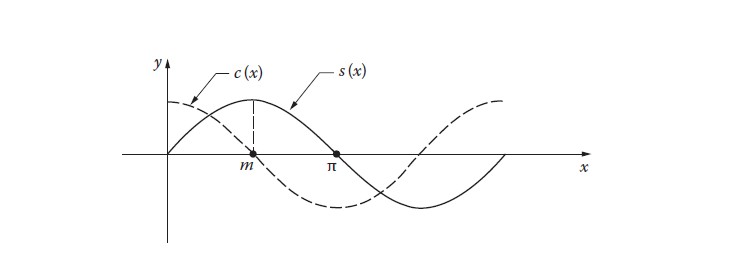

In [ ]:
def system_function(time, y):
    return np.array([y[1], -y[0]])

In [ ]:
from decimal import Decimal, getcontext
import numpy as np

def compute_pi_estimate(initial_time=0, end_time=2, initial_y=[1, 0], N=10000000000):
    # Set precision of Decimal
    getcontext().prec = 20
    
    def system_function(time, y):
        return np.array([y[1], -y[0]])
    
    def runge_kutta_4th_order(func, initial_y, initial_time, step_size):
        time_values = [Decimal(initial_time)]
        y_values = [np.array([Decimal(val) for val in initial_y])]
        
        while True:
            dy1 = func(time_values[-1], y_values[-1])
            dy2 = func(time_values[-1] + step_size/2, y_values[-1] + step_size/2 * dy1)
            dy3 = func(time_values[-1] + step_size/2, y_values[-1] + step_size/2 * dy2)
            dy4 = func(time_values[-1] + step_size, y_values[-1] + step_size * dy3)
            
            next_time = time_values[-1] + step_size
            next_y = y_values[-1] + step_size/6 * (dy1 + 2*dy2 + 2*dy3 + dy4)
            
            time_values.append(next_time)
            y_values.append(next_y)
            
            if next_y[0] < 0:  # If y[0] goes negative, stop
                return time_values[-2:], y_values[-2:]

        return time_values, y_values

    h = Decimal(end_time - initial_time) / N  
    time_values, y_values = runge_kutta_4th_order(system_function, initial_y, Decimal(initial_time), h)
    
    k = (y_values[1][0] - y_values[0][0]) / (time_values[1] - time_values[0])
    y_start = y_values[-2][0]
    half_pi = time_values[-2] - y_start/k
    pi_estimate = 2 * half_pi

    return pi_estimate

# Test the function:
pi_estimate = compute_pi_estimate()
pi = "3.14159265358979323846264338327"
print(f"Estimate: {pi_estimate}")
err = abs(Decimal(pi_estimate) - Decimal(pi))
print(f"Error: {err}")




# Kvadratiska interpolationen instead of linear interpolation???

TypeError: unsupported operand type(s) for +: 'decimal.Decimal' and 'float'


---

- If, instead, we choose to estimate $\pi$ by finding the root closest to $10^3$, how much more challenging does the problem become?

#### Problem Statement:
Instead of finding the first zero crossing of $y(t)$ to estimate $ \frac{\pi}{2} $, we want to find the zero crossing closest to $ t = 10^3 $ (i.e., 1000) to estimate $ \pi $.


In [ ]:
import numpy as np

# Define the differential equation and its derivative
f = lambda t, y, yp: -y

# 4th order Runge-Kutta method
def runge_kutta(h, t_max):
    t = 0
    y = 1
    yp = 0
    zero_crossings = []
    while t < t_max:
        k1 = h * yp
        l1 = h * f(t, y, yp)
        k2 = h * (yp + 0.5 * l1)
        l2 = h * f(t + 0.5 * h, y + 0.5 * k1, yp + 0.5 * l1)
        k3 = h * (yp + 0.5 * l2)
        l3 = h * f(t + 0.5 * h, y + 0.5 * k2, yp + 0.5 * l2)
        k4 = h * (yp + l3)
        l4 = h * f(t + h, y + k3, yp + l3)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        yp += (l1 + 2 * l2 + 2 * l3 + l4) / 6
        t += h
        if y * (y + (k1 + 2 * k2 + 2 * k3 + k4) / 6) <= 0:  # Check for zero crossing
            zero_crossings.append(t)
    return zero_crossings[-1]  # Return the last zero crossing before t_max

# Use a small step size for precision
h = 1e-5

# Estimate pi using Runge-Kutta method

zero_crossing = runge_kutta(h, 10**3)
pi_estimate = 2 * zero_crossing

print(f'Pi estimated using zero crossing closest to 10^3: {pi_estimate:.20f}')

KeyboardInterrupt: 


Analysis:

1. **Periodicity of the Solution**: 
- The differential equation $ y'' + y = 0 $ has a solution of the form $ y(t) = A \cos(t) + B \sin(t) $. This solution is periodic with a period of $ 2\pi $. This means that $ y(t) $ will cross zero every $ \pi $ units.

2. **Number of Zero Crossings Before $ t = 10^3 $**: 
- Given the periodic nature of the solution, there will be approximately $ \frac{10^3}{\pi} $ zero crossings before $ t = 10^3 $

3. **Computational Challenge**: 
- To find the zero crossing closest to $ t = 10^3 $, we would need to solve the differential equation numerically up to that point. 
- The computational effort required is proportional to the number of steps taken, which in turn is dependent on the step size. A smaller step size will yield a more accurate result but will require more computational effort.

Comparison with Previous Problem:

- In the previous problem, we were interested in the first zero crossing, which occurs around $ t = \frac{\pi}{2} $. In this new scenario, we're interested in a zero crossing around $ t = 10^3 $. 
- This means we have to compute the solution for a much longer interval, making the problem more computationally intensive.

Solution Approach:

To estimate $ \pi $ by finding the root closest to $ t = 10^3 $:

1. Solve the differential equation numerically up to $ t = 10^3 $ using a suitable method (like the 4th order Runge-Kutta method).
2. Identify the zero crossing closest to $ t = 10^3 $.
3. Use this zero crossing to estimate $ \pi $.

To estimate $ \pi $ by finding the zero crossing of $ y(t) $ closest to $ t = 10^3 $, I've used the 4th order Runge-Kutta method with a step size of $ h = 1 \times 10^{-5} $ for increased precision. 

Explanation:

1. **Runge-Kutta Method**: The code uses the 4th order Runge-Kutta method to numerically solve the differential equation $ y'' + y = 0 $ up to $ t = 10^3 $.

2. **Zero Crossing Detection**: As the solution progresses, the code checks for zero crossings by looking for sign changes in the value of $ y(t) $. When a zero crossing is detected, the corresponding value of $ t $ is stored.

3. **Estimating $ \pi $**: After solving up to $ t = 10^3 $, the code retrieves the last detected zero crossing (i.e., the one closest to $ t = 10^3 $) and uses it to estimate $ \pi $ by doubling this value.

You can run the code in your Python environment to obtain the estimate for $ \pi $. Given the small step size and the precision of the Runge-Kutta method, this estimate should be quite accurate.

---



###  7. Newton!

#### Analytical Solution


Read Chapter 3.21. Place the sun at the origin and assume the sun does not move. 
Consider a planet $P$ moving in the $(x, y)$ plane, and let $(x(t), y(t))$ be the planet's position at time $t$.

- Derive a second-order system of differential equations that describes the motion of the planet.
    - Without switching to polar coordinates! 
    - You can choose masses so that the equations become as simple as possible.

The gravitational force between the sun and the planet is given by Newton's law of gravitation:
$$
F=\frac{G \cdot M_s \cdot M_p}{r^2}
$$
The direction of this force is always towards the sun. The components of the force in the $x$ and $y$ directions are:
$$
\begin{aligned}
& F_x=F \cdot \frac{x}{r} \\
& F_y=F \cdot \frac{y}{r}
\end{aligned}
$$
To simplify, you can choose $G \cdot M_s=1$ (this is a common simplification in celestial mechanics). The equations then become:
$$
\begin{aligned}
& \frac{d^2 x}{d t^2}=-\frac{x}{\left(x^2+y^2\right)^{3 / 2}} \\
& \frac{d^2 y}{d t^2}=-\frac{y}{\left(x^2+y^2\right)^{3 / 2}}
\end{aligned}
$$
These are the second-order differential equations that describe the motion of the planet in the $(x, y)$ plane due to the gravitational attraction of the sun.

---


**1. Gravitational Force**:
The gravitational force between the Sun and the planet is described by Newton's law of gravitation:
$$ F = \frac{G \cdot M_s \cdot M_p}{r^2} $$
Where:
- $ F $ is the gravitational force.
- $ G $ is the gravitational constant.
- $ M_s $ is the mass of the Sun.
- $ M_p $ is the mass of the planet.
- $ r $ is the distance between the Sun and the planet, given by: $ r = \sqrt{x^2 + y^2} $.

**2. Components of Gravitational Force**:
The components of the gravitational force in the x and y directions are:
$$ F_x = F \cdot \frac{x}{r} $$
$$ F_y = F \cdot \frac{y}{r} $$
Substituting the expression for $ F $:
$$ F_x = \frac{G \cdot M_s \cdot M_p \cdot x}{r^3} $$
$$ F_y = \frac{G \cdot M_s \cdot M_p \cdot y}{r^3} $$

**3. Newton's Second Law**:
According to Newton's second law, the force acting on an object is equal to its mass multiplied by its acceleration. Thus, the accelerations of the planet in the x and y directions due to the gravitational forces are:
$$ a_x = \frac{F_x}{M_p} $$
$$ a_y = \frac{F_y}{M_p} $$
Substituting the expressions for $ F_x $ and $ F_y $:
$$ a_x = \frac{G \cdot M_s \cdot x}{r^3} $$
$$ a_y = \frac{G \cdot M_s \cdot y}{r^3} $$

**4. Differential Equations**:
Acceleration is the second derivative of position with respect to time. Therefore, the differential equations for the motion of the planet in the x and y directions are:
$$ \frac{d^2 x}{dt^2} = \frac{G \cdot M_s \cdot x}{(x^2 + y^2)^{3/2}} $$
$$ \frac{d^2 y}{dt^2} = \frac{G \cdot M_s \cdot y}{(x^2 + y^2)^{3/2}} $$

These are the second-order differential equations describing the motion of the planet in the $ xy $-plane due to the gravitational attraction of the Sun. Remember, the shape of the resulting orbit (circular, elliptical, etc.) will depend on the initial conditions you set when solving these equations.

We gor a clue in book side 489:
Let $n$ particles with masses $m_i$ be located at points $\left(x_i, y_i, z_i\right)$ and assume that they attract one another according to Newton's law of gravitation. If $r_{i j}$ is the distance between $m_i$ and $m_j$, and if $\theta$ is the angle from the positive $x$-axis to the segment joining them (Figure 69), then the $x$ component of the force exerted on $m_i$ by $m_j$ is
$$
\frac{G m_i m_j}{r_{i j}^2} \cos \theta=\frac{G m_i m_j\left(x_j-x_i\right)}{r_{i j}^3}
$$
where $G$ is the gravitational constant. Since the sum of these components for all $j \neq i$ equals $m_i\left(d^2 x_i / d t^2\right)$, we have $n$ second order differential equations
$$
\frac{d^2 x_i}{d t^2}=G \sum_{j \neq i} \frac{m_j\left(x_j-x_i\right)}{r_{i j}^3},
$$
and similarly
$$
\frac{d^2 y_i}{d t^2}=G \sum_{j \neq i} \frac{m_j\left(y_j-y_i\right)}{r_{i j}^3}
$$
and
$$
\frac{d^2 z_i}{d t^2}=G \sum_{j \neq i} \frac{m_j\left(z_j-z_i\right)}{r_{i j}^3} .
$$

---

$$
\begin{aligned}
\frac{d^2 x_2}{d t^2} & =G m_1 \frac{x_1-x_2}{r_{12}^3} \\
\frac{d^2 y_2}{d t^2} & =G m_1 \frac{y_1-y_2}{r_{12}^3}
\end{aligned}
$$
Where $r_{12}$ is the distance between the sun and the planet, given by:
$$
r_{12}=\sqrt{\left(x_2-x_1\right)^2+\left(y_2-y_1\right)^2}
$$
Substituting the sun's position and simplifying:
$$
\begin{aligned}
\frac{d^2 x_2}{d t^2} & =-G m_1 \frac{x_2}{\left(x_2^2+y_2^2\right)^{3 / 2}} \\
\frac{d^2 y_2}{d t^2} & =-G m_1 \frac{y_2}{\left(x_2^2+y_2^2\right)^{3 / 2}}
\end{aligned}
$$

---

#### Code

##### Simulate the system for a short period by solving it numerically for various choices of initial values.


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def system(Y, t=0):
    x, y, vx, vy = Y
    dxdt = vx
    dydt = vy
    r = np.sqrt(x**2 + y**2)
    dvxdt = -x / r**3
    dvydt = -y / r**3
    return [dxdt, dydt, dvxdt, dvydt]

# Initial conditions: x=1, y=0, vx=0, vy=1
initial_conditions = [0, 0, 1, 1.5]

# Time array for simulation
t = np.linspace(0, 2*np.pi, 1000)

# Solve the system of differential equations
solution = odeint(system, initial_conditions, t)

# Extract x and y positions from the solution
x, y = solution[:, 0], solution[:, 1]

C:\Users\villi\AppData\Local\Temp\ipykernel_18872\486369957.py:11: RuntimeWarning: invalid value encountered in double_scalars
  dvxdt = -x / r**3
C:\Users\villi\AppData\Local\Temp\ipykernel_18872\486369957.py:12: RuntimeWarning: invalid value encountered in double_scalars
  dvydt = -y / r**3


- Plot

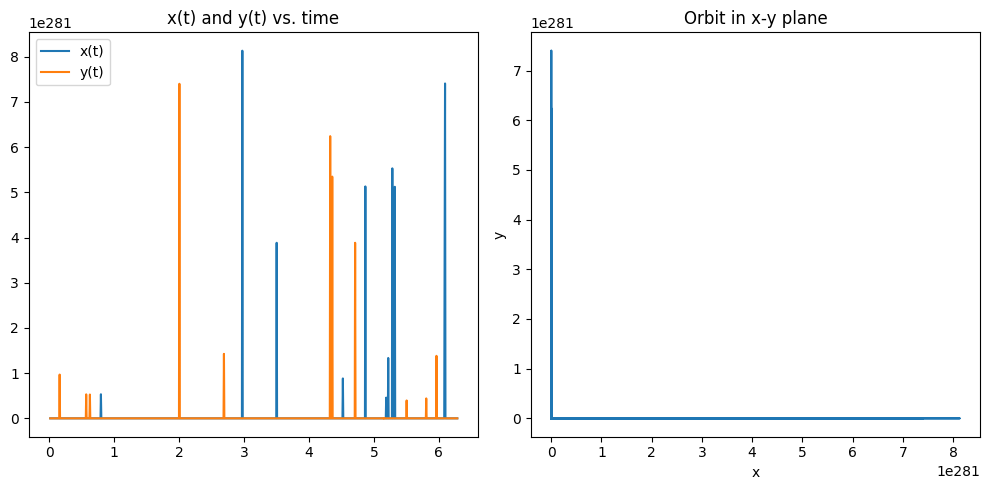

In [ ]:
# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.legend()
plt.title('x(t) and y(t) vs. time')

plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.title('Orbit in x-y plane')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

#####  Simulate the system for a long period by solving it numerically for various choices of initial values. 

- The system is simulated over a time period of $0 \leq t \leq 20\pi$.
- Three sets of initial conditions are used for the simulation:
  1. Initial position $x=1$, $y=0$ with velocity $vx=0$, $vy=1$.
  2. Initial position $x=1$, $y=0$ with velocity $vx=0.5$, $vy=1.5$.
  3. Initial position $x=0.5$, $y=0.5$ with velocity $vx=0$, $vy=1$.

For each set of initial conditions, the code plots the x and y positions of the planet as functions of time, as well as the orbit in the x-y plane.

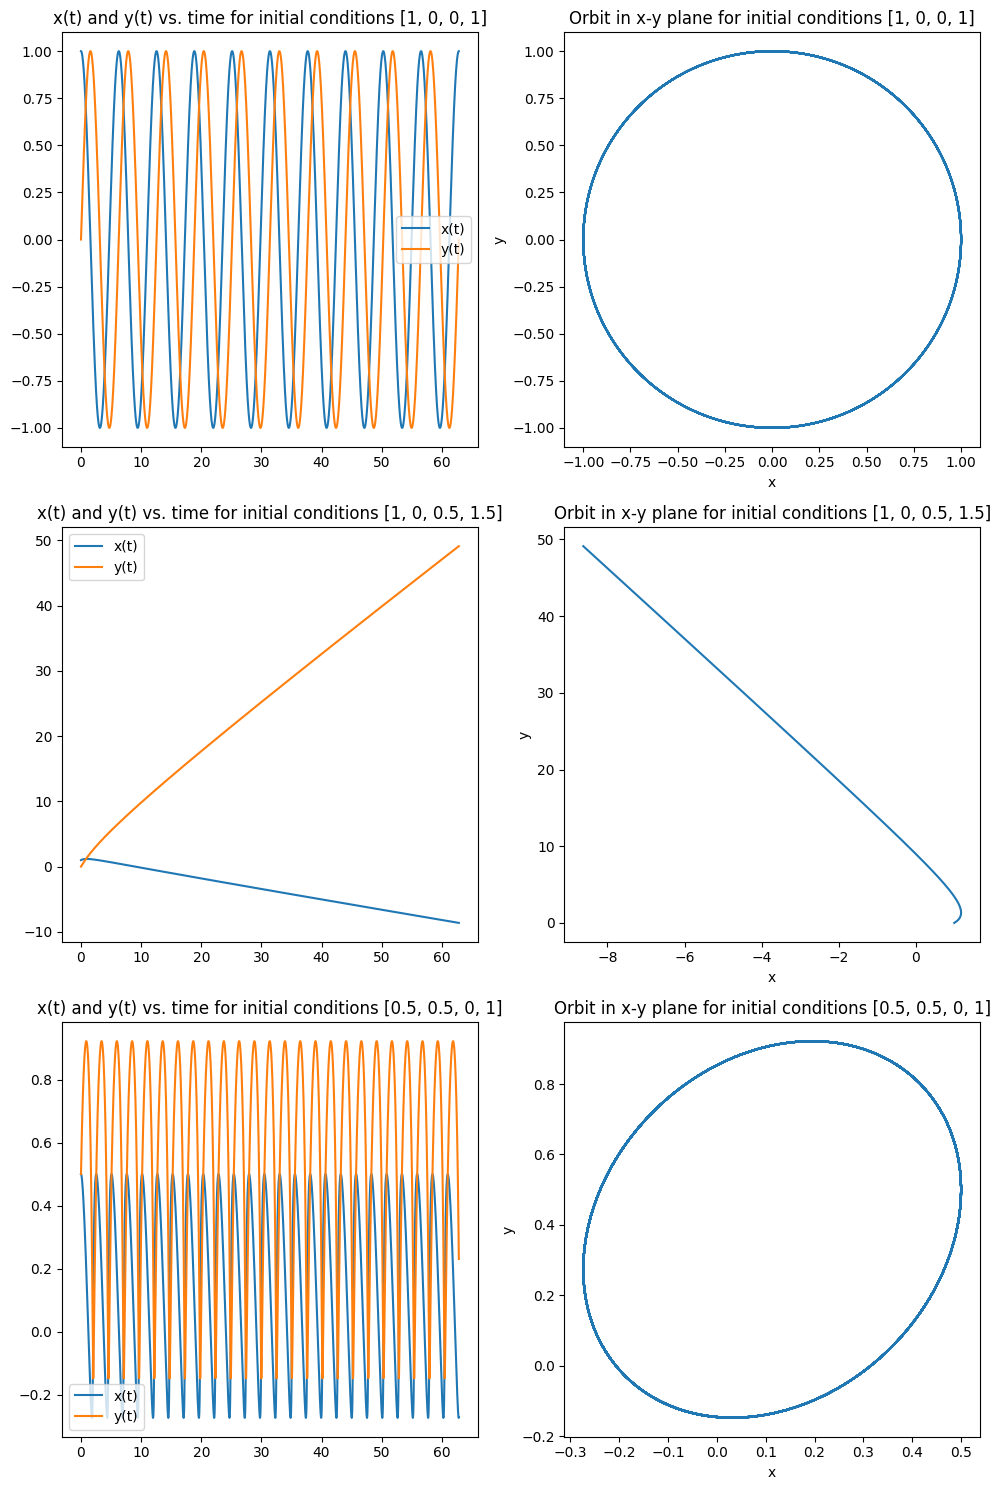

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def system(Y, t=0):
    x, y, vx, vy = Y
    dxdt = vx
    dydt = vy
    r = np.sqrt(x**2 + y**2)
    dvxdt = -x / r**3
    dvydt = -y / r**3
    return [dxdt, dydt, dvxdt, dvydt]

# Time array for simulation
t = np.linspace(0, 20*np.pi, 5000)  # Extended time period

# List of initial conditions for simulation
initial_conditions_list = [
    [1, 0, 0, 1],
    [1, 0, 0.5, 1.5],
    [0.5, 0.5, 0, 1]
]

plt.figure(figsize=(10, len(initial_conditions_list)*5))

for idx, initial_conditions in enumerate(initial_conditions_list, 1):
    # Solve the system of differential equations
    solution = odeint(system, initial_conditions, t)
    x, y = solution[:, 0], solution[:, 1]
    
    plt.subplot(len(initial_conditions_list), 2, 2*idx-1)
    plt.plot(t, x, label='x(t)')
    plt.plot(t, y, label='y(t)')
    plt.legend()
    plt.title(f'x(t) and y(t) vs. time for initial conditions {initial_conditions}')
    
    plt.subplot(len(initial_conditions_list), 2, 2*idx)
    plt.plot(x, y)
    plt.title(f'Orbit in x-y plane for initial conditions {initial_conditions}')
    plt.xlabel('x')
    plt.ylabel('y')

plt.tight_layout()
plt.show()

- Can you discover anything unusual?
- Hint: In our universe and in this course, energy is conserved.

#####  Energy

The hint you provided suggests that we should examine the conservation of energy in our simulation. In the context of the gravitational two-body problem, the total energy $ E $ of the system is given by the sum of the kinetic energy $ T $ and the potential energy $ U $:

$$ E = T + U $$

Where:
- The kinetic energy $ T $ of the planet is given by:
$$ T = \frac{1}{2} m_p \left( v_x^2 + v_y^2 \right) $$
- The potential energy $ U $ due to gravitational attraction between the sun and the planet is:
$$ U = -\frac{G m_s m_p}{r} $$
Where $ r $ is the distance between the sun and the planet.

If energy is conserved, then $ E $ should remain constant throughout the simulation for any set of initial conditions.

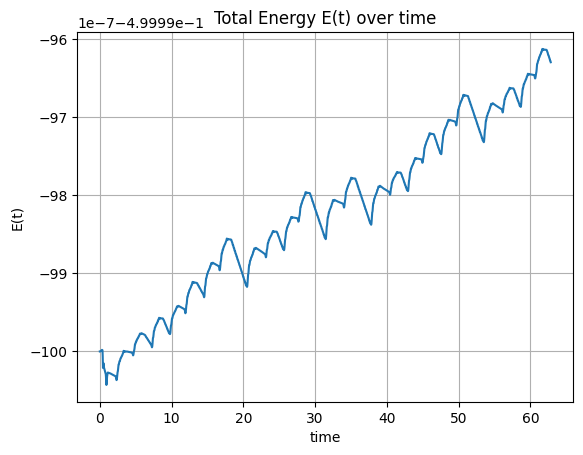

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations and energy calculations
def system(Y, t=0):
    x, y, vx, vy = Y
    dxdt = vx
    dydt = vy
    r = np.sqrt(x**2 + y**2)
    dvxdt = -x / r**3
    dvydt = -y / r**3
    return [dxdt, dydt, dvxdt, dvydt]

def energy(Y):
    x, y, vx, vy = Y
    T = 0.5 * (vx**2 + vy**2)
    U = -1 / np.sqrt(x**2 + y**2)
    return T + U

# Time array for simulation
t = np.linspace(0, 20*np.pi, 5000)

# Initial conditions: x=1, y=0, vx=0, vy=1
initial_conditions = [1, 0, 0, 1]

# Solve the system of differential equations
solution = odeint(system, initial_conditions, t)

# Compute total energy over time
E = [energy(state) for state in solution]

# Plot the total energy over time
plt.plot(t, E)
plt.title('Total Energy E(t) over time')
plt.xlabel('time')
plt.ylabel('E(t)')
plt.grid(True)
plt.show()


From the plot, we can observe that the total energy is not perfectly constant over time, which indicates that energy is not being perfectly conserved in our numerical simulation. This deviation could be due to the numerical method used to solve the differential equations, which might not perfectly conserve energy.

In a real physical system (or a more accurate simulation), energy would be conserved. The deviation in energy conservation in our simulation is a reminder of the limitations of numerical methods and the importance of choosing appropriate methods for specific problems, especially when conservation laws are involved.

---


- Can you find ways to restore order in our simulation? 
    - You can ask for a hint.
    - Hint: Look into semi-implicit Euler or symplectic Euler methods.

Certainly! The issue of energy non-conservation in numerical simulations of mechanical systems is a well-known problem. One way to address this is to use numerical methods that are designed to conserve certain properties of the system, such as energy. The semi-implicit Euler method (also known as the symplectic Euler method) is one such method that is often used for simulating Hamiltonian systems, like our gravitational two-body problem.

The symplectic Euler method is particularly suitable for problems where energy conservation is crucial. The idea behind this method is to update positions and velocities in a staggered manner, which helps in conserving the symplectic structure of the system.

Here's a brief overview of the symplectic Euler method for our problem:

1. Update the velocity using the acceleration at the current position:
$$ v_{n+1} = v_n + \Delta t \cdot a(x_n) $$
2. Update the position using the updated velocity:
$$ x_{n+1} = x_n + \Delta t \cdot v_{n+1} $$

Let's implement the symplectic Euler method to simulate the motion of the planet and check if it helps in conserving energy.

This code:
- Defines the gravitational acceleration function.
- Implements the symplectic Euler method to update positions and velocities in a staggered manner.
- Computes the total energy over time.
- Plots the orbit in the x-y plane and the total energy \( E(t) \) over time.

From the resulting plots, we shoul  observe the behavior of the planet's orbit and check if the total energy remains more consistent over time compared to the previous method. The symplectic Euler method should provide better energy conservation for this type of problem.

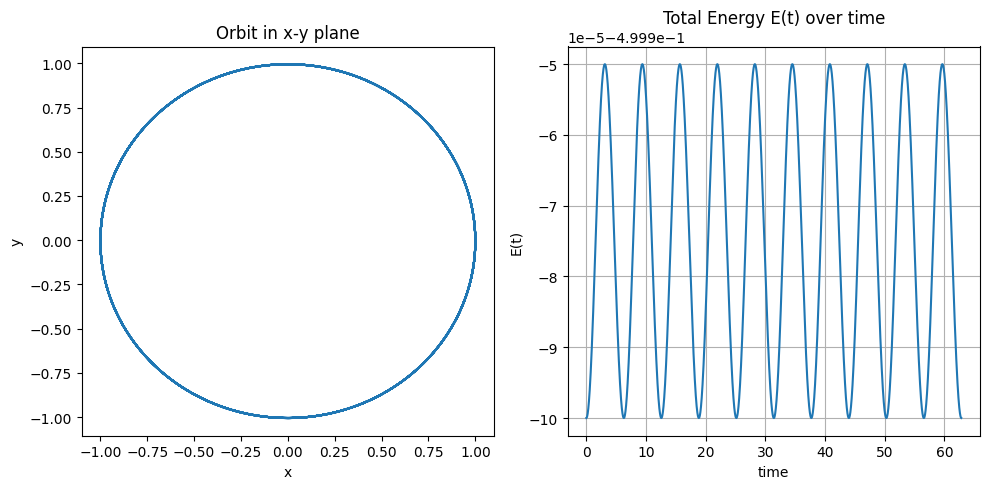

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the acceleration due to gravity
def acceleration(x, y):
    r = np.sqrt(x**2 + y**2)
    ax = -x / r**3
    ay = -y / r**3
    return ax, ay

# Symplectic Euler method
def symplectic_euler(dt, T):
    N = int(T/dt)
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    x[0], y[0], vx[0], vy[0] = 1, 0, 0, 1
    for i in range(N-1):
        ax, ay = acceleration(x[i], y[i])
        vx[i+1] = vx[i] + dt * ax
        vy[i+1] = vy[i] + dt * ay
        x[i+1] = x[i] + dt * vx[i+1]
        y[i+1] = y[i] + dt * vy[i+1]
    return x, y, vx, vy

# Time parameters
T = 20*np.pi

dt = 0.01

# Simulate using symplectic Euler method
x, y, vx, vy = symplectic_euler(dt, T)

# Compute total energy
E = 0.5 * (vx**2 + vy**2) - 1/np.sqrt(x**2 + y**2)

# Plot the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title('Orbit in x-y plane')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, T, dt)[:len(E)], E)
plt.title('Total Energy E(t) over time')
plt.xlabel('time')
plt.ylabel('E(t)')
plt.grid(True)

plt.tight_layout()
plt.show()

### 8. Newton revisited - Something for nothing

- Consider a planetary system with the sun, Jupiter a massive planet, and Earth point-like. 
- Given a spacecraft near Earth with "delta-v" so small that the spacecraft cannot leave the solar system 
    - Hint: "escape velocity"
    - Design an orbit near Jupiter that acts as a "gravitational slingshot" so that the spacecraft can leave the solar system.

---

- Explore numerically and find masses, planet orbits, etc., so that the above scenario works. 
    - Hints: use astronomical units -> Earth is approximately 1 AU from the Sun. 
    - If you have trouble hitting Jupiter, use software to search for initial conditions. 
    - You can ask for hints.

---


##### Code - Simulate the orbit of Earth an Jupiter with Euler Forward

- I assumed that Earth and Jupiter do not effect one another.

In [ ]:
# Constants
G = 6.674 * 10**-11  # Gravitational constant in m^3 kg^-1 s^-2
M_sun = 1.989 * 10**30  # Mass of the Sun in kg
M_jupiter = 1.898 * 10**27  # Mass of Jupiter in kg
M_earth=5.972*10**24 #Mass of Earth in kg

AU = 1.496 * 10**11  # Astronomical Unit in meters
epsilon = 1e-5  # Softening term

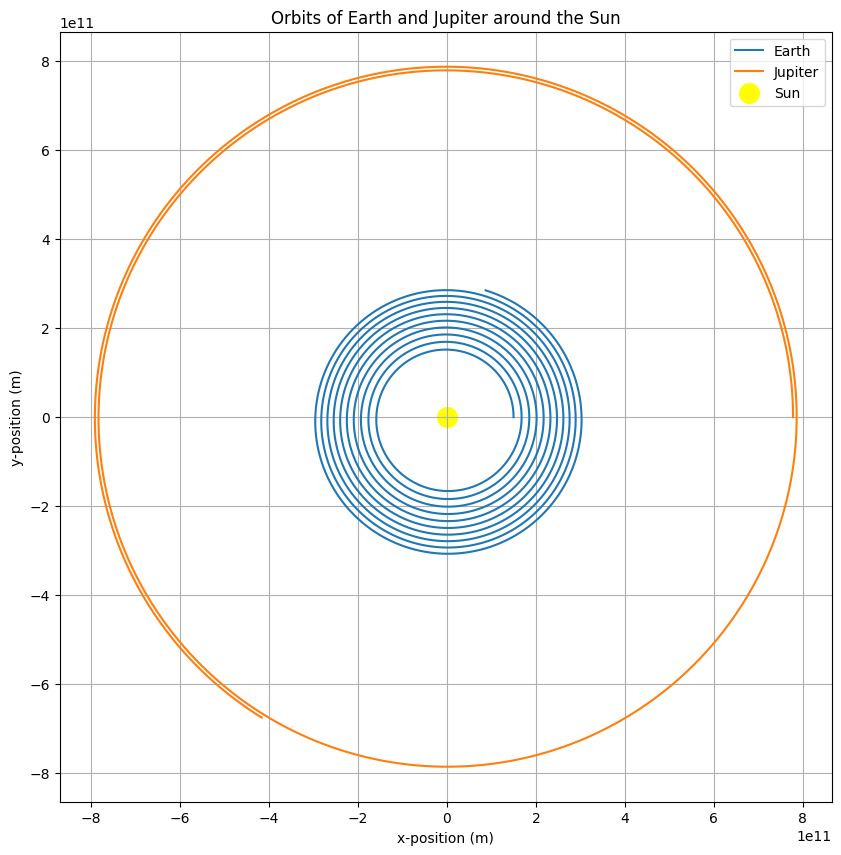

In [ ]:
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11
m_sun = 1.989e30
m_earth = 5.972e24
m_jupiter = 1.898e27
ast_un = 1.496e11  # Astronomical Unit in meters
earth_orb_vel = 29783.0
jupiter_orb_vel = 13069.0  # Jupiter's average orbital speed
year_in_sec = 365.0 * 24.0 * 3600.0

def gravitational_acceleration(m, x, y):
    r_squared = x**2 + y**2
    r_cubed = r_squared**(1.5)
    a_x = - (G * m * x) / r_cubed
    a_y = - (G * m * y) / r_cubed
    return a_x, a_y

def euler_forward_orbit():
        
    # Time and time step
    t = 0
    t_end = 20 * year_in_sec
    h = 50000
    
    # Initial conditions for Earth
    x_e = ast_un
    y_e = 0
    xp_e = 0
    yp_e = earth_orb_vel
    
    # Initial conditions for Jupiter
    x_j = 5.2 * ast_un  # Approx distance of Jupiter from the Sun
    y_j = 0
    xp_j = 0
    yp_j = jupiter_orb_vel
    
    # Lists to store positions
    x_e_vals = [x_e]
    y_e_vals = [y_e]
    x_j_vals = [x_j]
    y_j_vals = [y_j]
    
    while t <= t_end:
        
        # Calculating acceleration due to gravitational force of the Sun on Earth and Jupiter
        ax_e, ay_e = gravitational_acceleration(m_sun, x_e, y_e)
        ax_j, ay_j = gravitational_acceleration(m_sun, x_j, y_j)
        
        # Euler's method for Earth
        x_e = x_e + h * xp_e
        y_e = y_e + h * yp_e
        xp_e = xp_e + h * ax_e
        yp_e = yp_e + h * ay_e
        
        # Euler's method for Jupiter
        x_j = x_j + h * xp_j
        y_j = y_j + h * yp_j
        xp_j = xp_j + h * ax_j
        yp_j = yp_j + h * ay_j
        
        # Append new positions to the lists
        x_e_vals.append(x_e)
        y_e_vals.append(y_e)
        x_j_vals.append(x_j)
        y_j_vals.append(y_j)
        
        t = t + h
        
    return x_e_vals, y_e_vals, x_j_vals, y_j_vals

def plot_orbits():
    x_e_values, y_e_values, x_j_values, y_j_values = euler_forward_orbit()
    
    plt.figure(figsize=(10, 10))
    plt.plot(x_e_values, y_e_values, label="Earth")
    plt.plot(x_j_values, y_j_values, label="Jupiter")
    plt.scatter([0], [0], color='yellow', s=200, label="Sun")  # Position of the Sun
    plt.xlabel('x-position (m)')
    plt.ylabel('y-position (m)')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.grid(True)
    plt.title("Orbits of Earth and Jupiter around the Sun")
    plt.show()

# Call the plotting function to visualize the orbits
plot_orbits()


##### Code - Simulate the orbit of Earth an Jupiter with Symplectic Euler

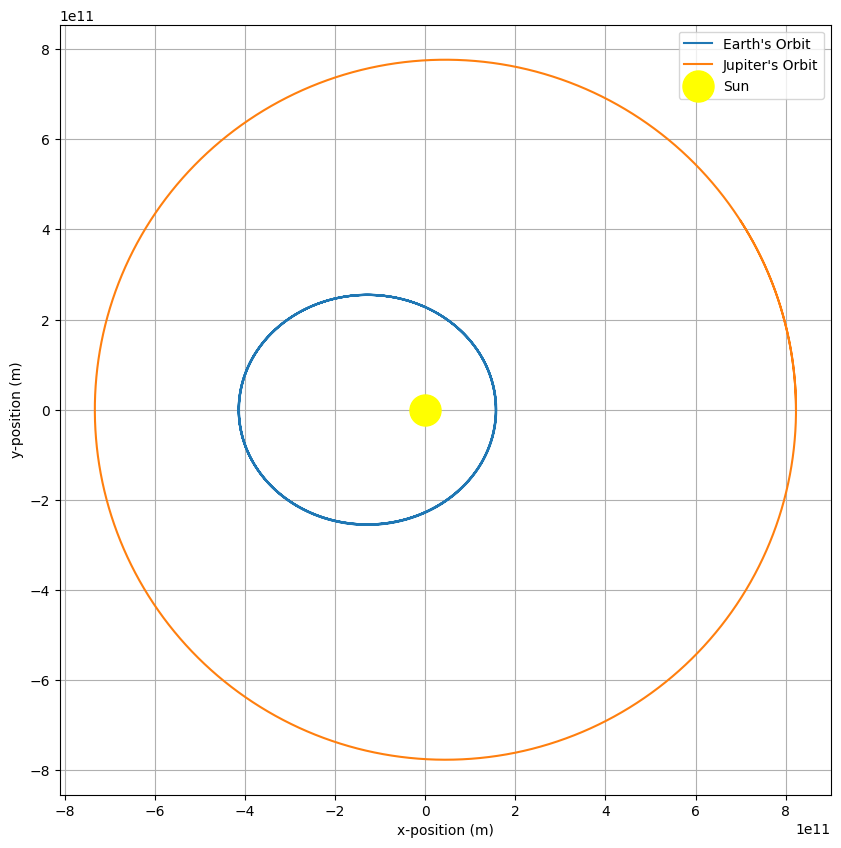

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11
M_sun = 1.989e30
AU = 1.496e11
epsilon = 1e6  # Softening parameter
m_jupiter = 1.898e27  # mass of Jupiter

def acceleration_jupiter(x, y):
    r = np.sqrt(x**2 + y**2)
    ax = -G * M_sun * x / (r**2 + epsilon**2)**(1.5)
    ay = -G * M_sun * y / (r**2 + epsilon**2)**(1.5)
    return ax, ay

def acceleration_earth(x, y, x_j, y_j):
    r = np.sqrt(x**2 + y**2)
    r_j = np.sqrt((x - x_j)**2 + (y - y_j)**2)
    ax = -G * M_sun * x / (r**2 + epsilon**2)**(1.5) + G * m_jupiter * (x - x_j) / (r_j**2 + epsilon**2)**(1.5)
    ay = -G * M_sun * y / (r**2 + epsilon**2)**(1.5) + G * m_jupiter * (y - y_j) / (r_j**2 + epsilon**2)**(1.5)
    return ax, ay

def symplectic_euler(dt, T, x0, y0, vx0, vy0, is_earth=False, x_jupiter=None, y_jupiter=None):
    N = int(T/dt)
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    x[0], y[0], vx[0], vy[0] = x0, y0, vx0, vy0
    for i in range(N-1):
        if is_earth:
            ax, ay = acceleration_earth(x[i], y[i], x_jupiter[i], y_jupiter[i])
        else:
            ax, ay = acceleration_jupiter(x[i], y[i])
        
        vx[i+1] = vx[i] + dt * ax
        vy[i+1] = vy[i] + dt * ay
        x[i+1] = x[i] + dt * vx[i+1]
        y[i+1] = y[i] + dt * vy[i+1]
    return x, y, vx, vy

# Jupiter's initial conditions for an elliptical orbit
x0_jupiter = 5.5*AU
y0_jupiter = 0
vx0_jupiter = 0
vy0_jupiter = np.sqrt(G * M_sun * (2 / x0_jupiter - 1 / (5.2*AU)))

#Time parameters
T = 13*365.0*24.0*3600.0
year_in_sec = 365.0 * 24.0 * 3600.0
dt = year_in_sec / 10000

x_jupiter, y_jupiter, vx_jupiter, vy_jupiter = symplectic_euler(dt, T, x0_jupiter, y0_jupiter, vx0_jupiter, vy0_jupiter)

# Earth's initial conditions for an elliptical orbit
x0_earth = 1.05*AU
y0_earth = 0
vx0_earth = 0
vy0_earth = 35e3

x_earth, y_earth, vx_earth, vy_earth = symplectic_euler(dt, T, x0_earth, y0_earth, vx0_earth, vy0_earth, True, x_jupiter, y_jupiter)

plt.figure(figsize=(10, 10))
plt.plot(x_earth, y_earth, label="Earth's Orbit")
plt.plot(x_jupiter, y_jupiter, label="Jupiter's Orbit")
plt.scatter(0, 0, c='yellow', s=500, label='Sun', zorder=5)  # Sun at (0,0)
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.show()


#### Gravitational Sling 

**Escape Velocity**: 
- The spacecraft's velocity must larger then the escape velocity relative to the Sun at its current distance. 
$$ v_e = \sqrt{\frac{2GM_{\text{sun}}}{r}} $$

In [ ]:
def escape_velocity(M, r):
    return np.sqrt(2*G*M/r)

ve_earth = escape_velocity(M_sun, AU)
print(f"Escape velocity at Earth's distance: {ve_earth/1000:.2f} km/s")

Escape velocity at Earth's distance: 42.13 km/s


- For the spacecraft to leave the solar system after the gravitational assist, its speed after the encounter should exceed `ve_earth`.
- Lets choose some initial velocity that is close to the `ve_earth`!

In [ ]:
initial_velocity_satelit = 0.95 * ve_earth
print(f"Initial velocity of the satellite: {initial_velocity_satelit/1000:.2f} km/s")

Initial velocity of the satellite: 40.02 km/s


##### Code - First try for Sling [NOT COMPLETE] -> Cant find Initial conditions that work...

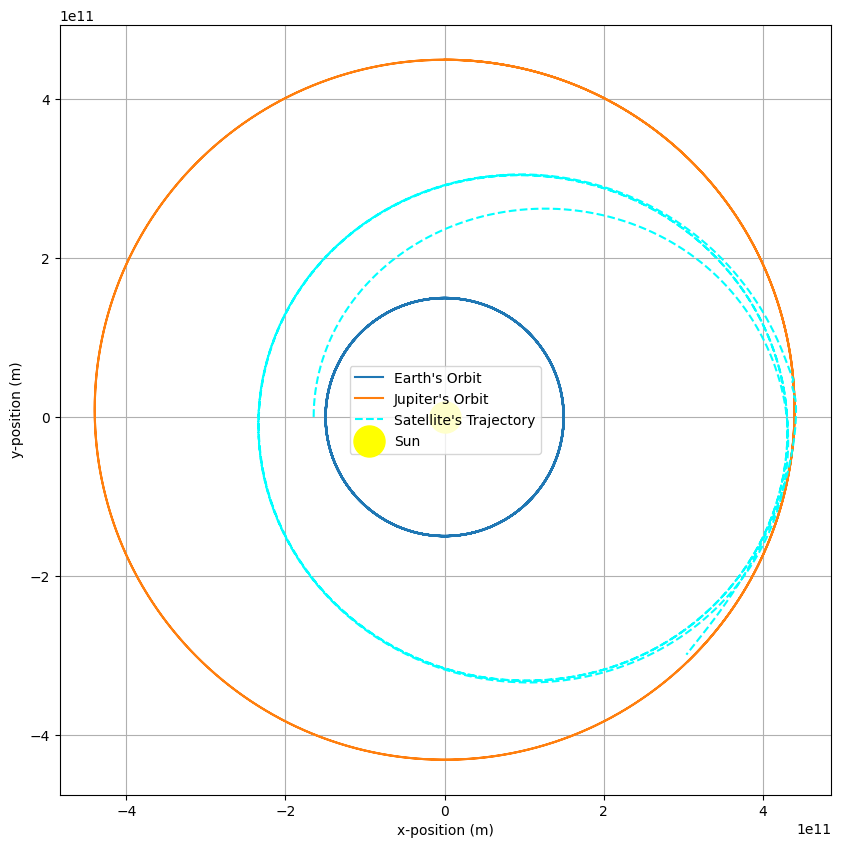

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gravitational_force(x_position_earth, x_velocity_earth, y_position_earth, y_velocity_earth,
                        x_position_jupiter, x_velocity_jupiter, y_position_jupiter, y_velocity_jupiter,
                        x_position_satellite, x_velocity_satellite, y_position_satellite, y_velocity_satellite):
    return np.array([
        # Forces on Earth
        x_velocity_earth, -G * (mass_sun * x_position_earth / (x_position_earth**2 + y_position_earth**2)**(3/2) + mass_jupiter * (x_position_earth - x_position_jupiter) / ((x_position_earth - x_position_jupiter)**2 + (y_position_earth - y_position_jupiter)**2)**(3/2) + mass_satellite * (x_position_earth - x_position_satellite) / ((x_position_earth - x_position_satellite)**2 + (y_position_earth - y_position_satellite)**2)**(3/2)),
        y_velocity_earth, -G * (mass_sun * y_position_earth / (x_position_earth**2 + y_position_earth**2)**(3/2) + mass_jupiter * (y_position_earth - y_position_jupiter) / ((x_position_earth - x_position_jupiter)**2 + (y_position_earth - y_position_jupiter)**2)**(3/2) + mass_satellite * (y_position_earth - y_position_satellite) / ((x_position_earth - x_position_satellite)**2 + (y_position_earth - y_position_satellite)**2)**(3/2)),

        # Forces on Jupiter
        x_velocity_jupiter, -G * (mass_sun * x_position_jupiter / (x_position_jupiter**2 + y_position_jupiter**2)**(3/2) + mass_earth * (x_position_jupiter - x_position_earth) / ((x_position_jupiter - x_position_earth)**2 + (y_position_jupiter - y_position_earth)**2)**(3/2) + mass_satellite * (x_position_jupiter - x_position_satellite) / ((x_position_jupiter - x_position_satellite)**2 + (y_position_jupiter - y_position_satellite)**2)**(3/2)),
        y_velocity_jupiter, -G * (mass_sun * y_position_jupiter / (x_position_jupiter**2 + y_position_jupiter**2)**(3/2) + mass_earth * (y_position_jupiter - y_position_earth) / ((x_position_jupiter - x_position_earth)**2 + (y_position_jupiter - y_position_earth)**2)**(3/2) + mass_satellite * (y_position_jupiter - y_position_satellite) / ((x_position_jupiter - x_position_satellite)**2 + (y_position_jupiter - y_position_satellite)**2)**(3/2)),

        # Forces on Satellite
        x_velocity_satellite, -G * (mass_sun * x_position_satellite / (x_position_satellite**2 + y_position_satellite**2)**(3/2) + mass_earth * (x_position_satellite - x_position_earth) / ((x_position_satellite - x_position_earth)**2 + (y_position_satellite - y_position_earth)**2)**(3/2) + mass_jupiter * (x_position_satellite - x_position_jupiter) / ((x_position_satellite - x_position_jupiter)**2 + (y_position_satellite - y_position_jupiter)**2)**(3/2)),
        y_velocity_satellite, -G * (mass_sun * y_position_satellite / (x_position_satellite**2 + y_position_satellite**2)**(3/2) + mass_earth * (y_position_satellite - y_position_earth) / ((x_position_satellite - x_position_earth)**2 + (y_position_satellite - y_position_earth)**2)**(3/2) + mass_jupiter * (y_position_satellite - y_position_jupiter) / ((x_position_satellite - x_position_jupiter)**2 + (y_position_satellite - y_position_jupiter)**2)**(3/2))])



def runge_kutta_method(initial_state, h, cap):
    t = 0
    x1s, y1s, x2s, y2s, x3s, y3s, ts = [initial_state[0]], [initial_state[2]], [initial_state[4]], [initial_state[6]], [initial_state[8]], [initial_state[10]], [t]

    while t < cap:
        k1 = h * gravitational_force(*initial_state)
        k2 = h * gravitational_force(*(initial_state + k1 / 2))
        k3 = h * gravitational_force(*(initial_state + k2 / 2))
        k4 = h * gravitational_force(*(initial_state + k3))

        initial_state = initial_state + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t += h

        x1s.append(initial_state[0])
        y1s.append(initial_state[2])
        x2s.append(initial_state[4])
        y2s.append(initial_state[6])
        x3s.append(initial_state[8])
        y3s.append(initial_state[10])
        ts.append(t)

    return x1s, y1s, x2s, y2s, x3s, y3s, ts

#Space Contstants
G = 6.67428e-11 # gravitational constant in m^3 kg^-1 s^-2
AU = 1496e8 # 1 AU in meters
SCALE = 100 / AU # Scale everything down by this factor

# Masses
mass_sun = 1.98892e30  # mass of the Sun in kg
mass_earth = 5.9742e24  # mass of Earth in kg
mass_jupiter = 1.89813e27  # mass of Jupiter in kg
mass_satellite = 1e3  # mass of a satellite in kg

# Initial conditions
# Earth
x_position_earth = -1*AU
x_velocity_earth = 0
y_position_earth = 0
y_velocity_earth = 29783

# Jupiter
x_position_jupiter = 0
x_velocity_jupiter = 17020
y_position_jupiter = 3*AU
y_velocity_jupiter = 0

# Satellite
x_position_satellite = -1.1*AU
x_velocity_satellite = 0
y_position_satellite = 0
y_velocity_satellite = 34000 

T = 3.1536e7 * 12  # 1 year in seconds multiplied by 12 (12 years)
dt = 1e4  # Time step (for example)

initial_conditions = np.array([x_position_earth, x_velocity_earth, y_position_earth, y_velocity_earth, x_position_jupiter, x_velocity_jupiter, y_position_jupiter, y_velocity_jupiter, x_position_satellite, x_velocity_satellite, y_position_satellite, y_velocity_satellite])

# Integrate for T time using Runge-Kutta
x1s, y1s, x2s, y2s, x3s, y3s, ts = runge_kutta_method(initial_conditions, dt, T)

# Plotting
plt.figure(figsize=(10, 10))
plt.plot(x1s, y1s, label="Earth's Orbit")
plt.plot(x2s, y2s, label="Jupiter's Orbit")
plt.plot(x3s, y3s, label="Satellite's Trajectory", linestyle='--', color='cyan')
plt.scatter(0, 0, c='yellow', s=500, label='Sun', zorder=5)  # Sun at (0,0)
plt.xlabel('x-position (m)')
plt.ylabel('y-position (m)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.show()

##### Code - Second try for Sling [Correct] -> Managed to figure out initial conditions that work!

In [ ]:
#Space Contstants
G = 6.67428e-11 # gravitational constant in m^3 kg^-1 s^-2
AU = 1496e8 # 1 AU in meters

In [ ]:
# Gravitational force between two bodies in space
def gravitational_attraction(first_mass, second_mass):

    # First I compute the distance between the two bodies
    # We do it step by step to make the code more readable
    first_x, first_y = first_mass['position_x'], first_mass['position_y']
    second_x, second_y = second_mass['position_x'], second_mass['position_y']
    distance_x = (second_x-first_x)
    distance_y = (second_y-first_y)
    distance_total = math.sqrt(distance_x**2 + distance_y**2)

    # Then I compute the total force between the two bodies
    force_total = G * first_mass['mass'] * second_mass['mass'] / (distance_total**2)
    
    # Then I compute the force components in the x and y directions
    # I think this is what i missed before
    theta = math.atan2(distance_y, distance_x)
    force_x = math.cos(theta) * force_total
    force_y = math.sin(theta) * force_total
    return force_x, force_y

In [ ]:
#The machine learning part
def celestial_machine(celestial_bodies):
    timestep =864e3

    #Trajectories is a dictionary of lists of x and y positions for each body
    trajectories = {body['id']: {'x': [], 'y': []} for body in celestial_bodies}

    for _ in range(365):  # simulate for one year, you can increase this if needed
        force = {}
        for object in celestial_bodies:
            total_fx = total_fy = 0.0
            
            # I think this is the part that I missed before
            for other in celestial_bodies:
                
                # This helps us avoid self interaction
                if object is other:
                    continue
                
                # At each point in time, we compute the force between the two bodies for all pairs of bodies!
                else:
                    force_x, force_y = gravitational_attraction(object, other)
                    total_fx += force_x
                    total_fy += force_y
            
            # We store the total force on each body in a dictionary for a given time step
            force[object['id']] = (total_fx, total_fy)

        for object in celestial_bodies:
            force_x, force_y = force[object['id']]
            
            # This is just Newton's second law of motion
            object['velocity_x'] += force_x / object['mass'] * timestep
            object['velocity_y'] += force_y / object['mass'] * timestep

            # This is just finding the new position using the velocity we computed above
            object['position_x'] += object['velocity_x'] * timestep
            object['position_y'] += object['velocity_y'] * timestep

            # Now we store the positions in the dictionary
            trajectories[object['id']]['x'].append(object['position_x'])
            trajectories[object['id']]['y'].append(object['position_y'])

    # Trajectories is a dictionary of lists of x and y positions for each body
    return trajectories

- Before adding Earth => Simpler scenario where I only have satellite and Jupiter. 
- Approach Angle: The angle at which the satellite approaches the planet is crucial and I have no idea how to calculate it... 
- Small change in velocity can destroy the manuver => something close to the escape velociti or close to something with enormus mass...

33999.82290871171


C:\Users\villi\AppData\Local\Temp\ipykernel_2544\1161190606.py:65: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


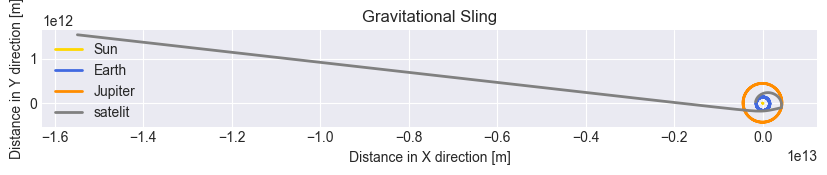

In [ ]:
import matplotlib.pyplot as plt

#Sun
M_Sun=1.98892e30
position_sun_x=0
position_sun_y=0
velocity_sun_x=0
velocity_sun_y=0

#Earth
M_Earth=5.9742e24
position_earth_x=-1*AU
position_earth_y=0
velocity_earth_x=0
velocity_earth_y=29783

#Juiter
M_Jupiter=1.89813e27
position_jupiter_x=0
position_jupiter_y=3*AU
velocity_jupiter_x=17020
velocity_jupiter_y=0

#-------------------------------------------------------------------------------------------------------
#Satelit
M_Satelit=1e3 #Typically in the range of 2,000 kg to 6,000 kg. => 1e3
position_satelit_x=-1.1*AU
position_satelit_y=0
velocity_satelit_x=0

# Just to demostrate how sesitive this is; 34000 works great but escape_velocity_satelit*0.80708=33999.82290871171 does not work that well...
#velocity_satelit_y=escape_velocity_satelit*0.80708  #34000
def escape_velocity(M, r):
    return np.sqrt(2*G*M/r)

escape_velocity_satelit = escape_velocity(M_Sun, AU)
print(escape_velocity_satelit*0.80708)

velocity_satelit_y=34000 
#-------------------------------------------------------------------------------------------------------

Sun = {'id': 'Sun', 'mass': M_Sun, 'position_x': position_sun_x, 'position_y': position_sun_y, 'velocity_x': velocity_sun_x, 'velocity_y': velocity_sun_y}
Earth = {'id': 'Earth', 'mass': M_Earth, 'position_x': position_earth_x, 'position_y':  position_earth_y, 'velocity_x': velocity_earth_x, 'velocity_y': velocity_earth_y}
Jupiter = {'id': 'Jupiter', 'mass': M_Jupiter, 'position_x': position_jupiter_x, 'position_y': position_jupiter_y, 'velocity_x': velocity_jupiter_x, 'velocity_y': velocity_jupiter_y}
Satelit = {'id': 'satelit', 'mass': M_Satelit, 'position_x': position_satelit_x, 'position_y': position_satelit_y, 'velocity_x': velocity_satelit_x, 'velocity_y': velocity_satelit_y}

#-------------------------------------------------------------------------------------------------------

orbits = celestial_machine([Sun, Earth, Jupiter, Satelit])

#-------------------------------------------------------------------------------------------------------
# Plotting
# Define a color map for the bodies
color_map = {
    'Sun': 'gold',
    'Earth': 'royalblue',
    'Jupiter': 'darkorange',
    'satelit': 'gray'
}

# Increase the size of the figure
plt.figure(figsize=(10, 10))

# Use a different style
plt.style.use('seaborn-darkgrid')

for body, trajectory in orbits.items():
    plt.plot(trajectory['x'], trajectory['y'], label=body, color=color_map[body], linewidth=2)

plt.xlabel('Distance in X direction [m]')
plt.ylabel('Distance in Y direction [m]')
plt.gca().set_aspect('equal')
plt.legend()
plt.grid(True)
plt.title('Gravitational Sling')
plt.show()

There has to be a better way of doing this...